In [51]:
import pandas as pd
import sklearn
import scipy.io as sio
import numpy as np
from os import getcwd
from os.path import join 
import matplotlib.pyplot as plt
import scipy.fft as fft
from lvm_read import read

In [90]:
caseR=read(join(os.getcwd(),'Case_R_(+25)/Case_R_(+25)_1/sine_sweep.lvm'))
caseH=read(join(os.getcwd(),'Case_H_(+25)/Case_H_(+25)_1/sine_sweep.lvm'))
caseL=read(join(os.getcwd(),'Case_R_(+25)/Case_R_(+25)_1/sine_sweep.lvm'))
caseH[0]['Channel names'].pop()
caseR[0]['Channel names'].pop()
caseL[0]['Channel names'].pop()
dfR=pd.DataFrame(caseR[0]['data'],columns=caseR[0]['Channel names'])
dfH=pd.DataFrame(caseH[0]['data'],columns=caseH[0]['Channel names'])
dfL=pd.DataFrame(caseL[0]['data'],columns=caseL[0]['Channel names'])
dfR.head()

,X_Value,Ch1,Ch2,Ch3,Ch4,Ch5,Ch6,Ch7,Ch8,K7861_H,...,Strain_16_temp_comp,Strain_17_rosette_A,Strain_18_rosette_B,Strain_19_rosette_C,Strain_20_rosette_A,Strain_21_rosette_B,Strain_22_rosette_C,Strain_23,Strain_24,Strain_16_temp_comp (Filtered)
0,0.0000,0.001935,0.000959,0.002144,-0.001090,0.001632,0.000360,-0.000706,0.001287,5.486116,...,-7.748118e-07,-0.000002,-0.000004,-0.000003,-0.000003,-0.000002,-0.000003,-1.193234e-06,-1.210742e-06,-0.000003
1,0.0006,0.001228,0.001371,0.001606,-0.000005,0.001673,0.000923,0.000200,0.000483,5.497067,...,-1.350953e-06,-0.000003,-0.000003,-0.000004,-0.000003,-0.000004,-0.000003,-8.582080e-07,-1.165173e-06,-0.000002
2,0.0012,0.002167,0.001453,0.001058,-0.000115,0.001825,0.000973,0.001064,-0.000358,5.498020,...,-2.903599e-06,-0.000002,-0.000004,-0.000003,-0.000003,-0.000003,-0.000003,-1.619334e-06,-9.796406e-07,-0.000002
3,0.0018,0.001728,0.001589,0.000873,-0.000523,0.000710,0.000291,-0.000367,0.000319,5.490879,...,-7.441041e-06,-0.000001,-0.000003,-0.000004,-0.000004,-0.000003,-0.000003,-1.583554e-06,-1.721768e-06,-0.000002
4,0.0024,0.001073,0.001575,0.001366,-0.000226,0.001327,0.000306,-0.001092,0.000962,5.485814,...,-8.596545e-06,-0.000002,-0.000003,-0.000003,-0.000003,-0.000002,-0.000002,-1.359120e-06,-1.835690e-06,-0.000001


In [102]:
N,Chno=dfH.shape
Ts = 6 * 1e-4 # sampling time
time = (np.linspace(1,N,N) - 1) * Ts

HCh1 = dfH['force']  # célula de carga: força do shakerH
HCh2 = dfH['Ch1'] # 
HCh3 = dfH['Ch2'] # 
HCh4 = dfH['Ch3'] # 
HCh5 = dfH['Ch4'] # 
HCh6 = dfH['Ch5'] # 
HCh7 = dfH['Ch6'] # 
HCh8 = dfH['Ch7'] # 
HCh9 = dfH['Ch8'] # 

RCh1 = dfH['force']  # célula de carga: força do shakerH
RCh2 = dfH['Ch1'] # 
RCh3 = dfH['Ch2'] # 
RCh4 = dfH['Ch3'] # 
RCh5 = dfH['Ch4'] # 
RCh6 = dfH['Ch5'] # 
RCh7 = dfH['Ch6'] # 
RCh8 = dfH['Ch7'] # 
RCh9 = dfH['Ch8'] # 

LCh1 = dfH['force']  # célula de carga: força do shakerH
LCh2 = dfH['Ch1'] # 
LCh3 = dfH['Ch2'] # 
LCh4 = dfH['Ch3'] # 
LCh5 = dfH['Ch4'] # 
LCh6 = dfH['Ch5'] # 
LCh7 = dfH['Ch6'] # 
LCh8 = dfH['Ch7'] # 
LCh9 = dfH['Ch8'] #

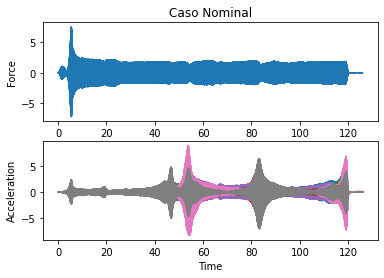

In [106]:

plt.figure()
plt.subplot(211)
plt.title('Caso Nominal')
plt.plot(time,RCh1)
plt.ylabel('Force')
plt.subplot(212)
plt.plot(time,RCh2,time,RCh3,time,RCh4,time,RCh5,time,RCh6,time,RCh7,time,RCh8,time,RCh9)
plt.xlabel('Time')
plt.ylabel('Acceleration')
plt.show()